<a href="https://colab.research.google.com/github/Abi-Lowkey/MachineLearningTasks/blob/main/9thWeekTasks/Classification_model_SVM_Classification_on_MaterialStrength.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Ketut Satria Wibisana

NIM : 1103213148

Lecture Week 9 : Classification model: SVM Classification

Dataset : MaterialStrength

Dokumentasi ChatGPT :[Link](https://chatgpt.com/share/6740d589-8684-8005-b2cb-6c9e4346b047)

Prompt ChatGPT : beri kode untuk connect gcolab dengan gdrive

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
#Import Library
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [5]:
# Path ke file CSV di Google Drive
file_path = '/content/drive/MyDrive/DatasetWeek9/MaterialStrength.csv'

# Membaca file CSV
df = pd.read_csv(file_path)

# Menampilkan 5 baris pertama
df.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,target_feature
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,0.300000,540.0,1.538462,1,0.350044,YEs,NO,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,0.300000,540.0,1.560651,1,0.452416,yES,nOO,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,0.685714,475.0,1.569024,0,6.704743,yEs,NO,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,0.685714,475.0,1.569024,0,8.891596,yes,NOO,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,0.966767,331.0,1.185221,0,8.126411,YeS,no,44.30


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   x1              1030 non-null   float64
 1   x2              1030 non-null   float64
 2   x3              1030 non-null   float64
 3   x4              1030 non-null   float64
 4   x5              1030 non-null   float64
 5   x6              1030 non-null   float64
 6   x7              1030 non-null   float64
 7   x8              1030 non-null   int64  
 8   x9              1030 non-null   float64
 9   x10             1030 non-null   float64
 10  x11             1030 non-null   float64
 11  x12             1030 non-null   int64  
 12  x13             1030 non-null   float64
 13  x14             1030 non-null   object 
 14  x15             1030 non-null   object 
 15  target_feature  1030 non-null   float64
dtypes: float64(12), int64(2), object(2)
memory usage: 128.9+ KB


In [7]:
df.describe()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,target_feature
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,0.748266,409.252039,1.273752,0.632039,1.213469,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,0.314005,92.780669,0.185670,0.482485,1.521690,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,0.266893,200.000000,0.858453,0.000000,0.072046,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,0.533333,336.425000,1.121488,0.000000,0.443705,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,0.675349,391.300000,1.266055,1.000000,0.767702,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,0.935165,483.700000,1.358146,1.000000,1.331512,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,1.882353,640.000000,1.874876,1.000000,14.553429,82.600000


Prompt ChatGPT: buatkan Classification model: SVM Classification dan Explore matriks evaluasi pada model klasifikasi (Akurasi,Presisi,Recall,F1,AUC,ROC,etc)

In [10]:
# Menggunakan LabelEncoder untuk mengubah kolom kategorikal menjadi numerik
label_encoder = LabelEncoder()

In [44]:
# Menerapkan LabelEncoder pada kolom x14 dan x15
df['x14'] = label_encoder.fit_transform(df['x14'])
df['x15'] = label_encoder.fit_transform(df['x15'])


In [45]:
# Misalnya kita buat kategori target (lebih dari 50 menjadi kelas 1, kurang dari atau sama dengan 50 menjadi kelas 0)
y_class = (df["target_feature"] > 50).astype(int)

In [46]:
# Memisahkan fitur dan target
X = df.drop(columns=["target_feature"])
y = y_class

In [47]:
# Membagi data menjadi data latih dan data uji (70% untuk latih dan 30% untuk uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [48]:
## Melatih model SVM dengan kernel linear dan mengaktifkan probability=True
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

SVC(kernel='linear', probability=True, random_state=42)

In [49]:
# Memprediksi hasil pada data uji
y_pred = svm_model.predict(X_test)

In [50]:
# Evaluasi model menggunakan berbagai metrik
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc = roc_auc_score(y_test, svm_model.predict_proba(X_test)[:, 1])

In [51]:
# Menampilkan hasil evaluasi
print(f"Akurasi: {accuracy:.4f}")
print(f"Presisi: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Akurasi: 0.9417
Presisi: 0.9375
Recall: 0.7500
F1 Score: 0.8333
AUC: 0.9848


In [52]:
# Menghitung ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, svm_model.predict_proba(X_test)[:, 1])

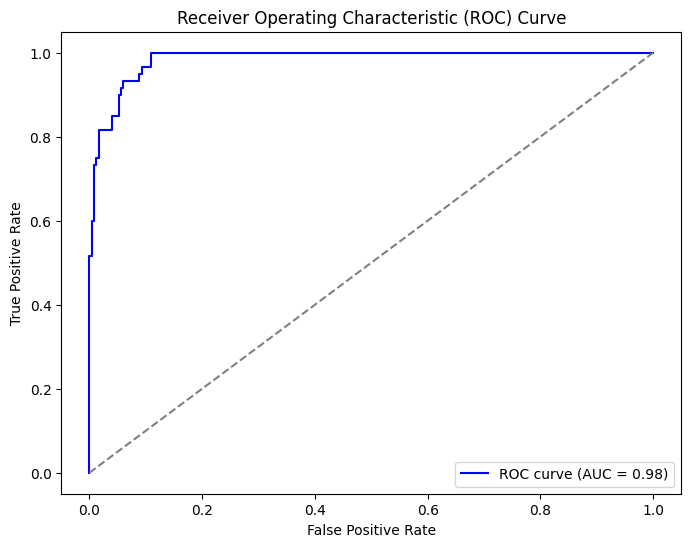

In [53]:
# Menampilkan ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()